In [15]:
import numpy as np
import sklearn
from tensorflow_similarity.indexer.indexer import Indexer
import matplotlib.pyplot as plt
import tempfile
import jsonlines
import os

In [16]:
x = np.random.randint(1000, size=(50000, 400))
y = np.random.randint(2, size=50000)
_, tmp_file_examples = tempfile.mkstemp()
with jsonlines.open(tmp_file_examples, mode='w') as writer:
    for data_point in x:
        writer.write(data_point.tolist())
_, tmp_file_labels = tempfile.mkstemp()
with jsonlines.open(tmp_file_labels, mode='w') as writer:
    for data_point in y:
        writer.write(data_point.tolist())

In [ ]:
indexer = Indexer(os.path.abspath(tmp_file_examples), None, os.path.abspath(tmp_file_labels), os.path.abspath("../../../tensorflow_similarity/serving/www/saved_models/IMDB_model.h5"), "./")
indexer.build()

In [ ]:
percentiles = list()
returned_points = list()

for i in range(len(x)):
    ids, _ = indexer.index.knnQuery(x[0], k=i)
    percentiles.append(i / len(x))
    returned_points.append(len(ids))

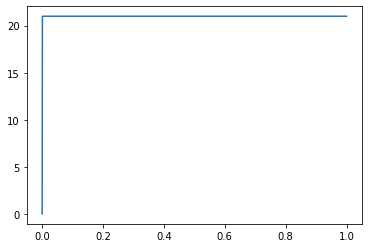

In [19]:
plt.plot(percentiles, returned_points)